# Week 3  - Assignment

In [2]:
# required packages:
import numpy as np
import pandas as pd
import sklearn
import skimage
import sqlalchemy as sa

import urllib.request
import requests
import sys
import json
import pickle
import gzip
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

!pip install pymysql
import pymysql

### Part 1
1. Plot the distribution of expression levels for EGFR (filter by gene_name) in breast cancer samples from protein_expression.BRCA-US.tsv.gz
2. Count the number of common SNPs on Chromosome M  (based on snp147Common table)

In [3]:
ICGC_API = 'https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/'
expression_fname = 'protein_expression.BRCA-US.tsv.gz'

if not Path(expression_fname).is_file():
    print("Downloading file", ICGC_API + expression_fname, "saving it as", expression_fname)
    urllib.request.urlretrieve(ICGC_API + expression_fname, expression_fname);
else:
    print("Local file exists:", expression_fname)

Local file exists: protein_expression.BRCA-US.tsv.gz


In [4]:
E = pd.read_csv(expression_fname, delimiter='\t')


In [5]:
engine = sa.create_engine('mysql+pymysql://genome@genome-mysql.cse.ucsc.edu/hg38', poolclass=sa.pool.NullPool)

meta = sa.MetaData(bind=engine)
meta.reflect(only=['snp147Common'])

snp_table = sa.Table('snp147Common',
    meta,
    sa.PrimaryKeyConstraint('name'),
    extend_existing=True)



### Part 2

1. Substitute missing values in `x` with the column mean and add an additional column to indicate when missing values have been substituted. The `isnull` method on the pandas dataframe may be useful.
2. Convert `x` to the z-scaled values. The StandardScaler method in the preprocessing module can be used or the z-scaled values calculated directly.
3. Convert `x['C']` into a categorical variable using a threshold of 0.125 

In [6]:
x = pd.DataFrame([[0,1,2,3,4,5,6],
                  [2,np.nan,7,4,9,1,3],
                  [0.1,0.12,0.11,0.15,0.16,0.11,0.14],
                  [100,120,np.nan,127,130,121,124],
                  [4,1,7,9,0,2,np.nan]], ).T
x.columns = index=['A', 'B', 'C', 'D', 'E']
print(x)


     A    B     C      D    E
0  0.0  2.0  0.10  100.0  4.0
1  1.0  NaN  0.12  120.0  1.0
2  2.0  7.0  0.11    NaN  7.0
3  3.0  4.0  0.15  127.0  9.0
4  4.0  9.0  0.16  130.0  0.0
5  5.0  1.0  0.11  121.0  2.0
6  6.0  3.0  0.14  124.0  NaN


### Part 3
1. Choose one of the histogram processing methods and apply it to the page example.
2. Take patches for the page example used above at different scales (10, 20 and 40 pixels). The resulting patches should be [rescaled](http://scikit-image.org/docs/stable/api/skimage.transform.html#rescale) to have the same size.
3. Change the vectorization approach to ignore very common words such as 'the' and 'a'. These are known as stop words. Reading the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) should help.
4. Change the vectorization approach to consider both single words and sequences of 2 words. Reading the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) should help.

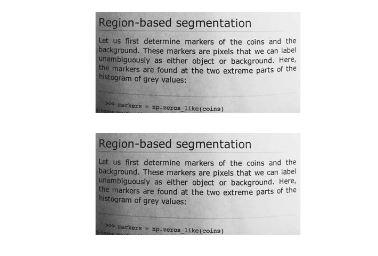

In [8]:
# 1

import skimage.data

img = skimage.data.page()

new_img = img # change new_img

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].imshow(img, cmap=plt.cm.gray)
axs[0].set_axis_off()
axs[1].imshow(img, cmap=plt.cm.gray)
axs[1].set_axis_off()
plt.show()

In [9]:
# 2

import sklearn.feature_extraction
import skimage.transform

page_img = skimage.data.page()


In [10]:
import sklearn.feature_extraction
import sklearn.datasets

twenty_train = sklearn.datasets.fetch_20newsgroups(subset='train',
    categories=['comp.graphics', 'sci.med'], shuffle=True, random_state=0)

count_vect = sklearn.feature_extraction.text.CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print("\nNo stop words:")
print("\tN documents", X_train_counts.shape[0])
print("\tM features", X_train_counts.shape[1])



No stop words:
	N documents 1178
	M features 24614
